In [1]:
# Import library, read data

import scipy.io
import numpy as np
import matplotlib.pyplot as plt
mat = scipy.io.loadmat('DATA.mat')
mat

{'__header__': b'MATLAB 5.0 MAT-file, Platform: MACI, Created on: Mon Dec  1 08:49:59 2008',
 '__version__': '1.0',
 '__globals__': [],
 'orig_AMSUA_O': array([[  0.   ,  90.   ,   0.   , ..., 259.71 , 273.8  , 200.54 ],
        [  0.   ,  90.   ,   1.125, ..., 259.71 , 273.8  , 200.54 ],
        [  0.   ,  90.   ,   2.25 , ..., 259.71 , 273.8  , 200.54 ],
        ...,
        [  0.   , -77.625, 322.875, ..., 208.25 , 220.92 , 161.95 ],
        [  0.   , -77.625, 324.   , ..., 208.35 , 221.16 , 160.82 ],
        [  0.   , -77.625, 325.125, ..., 208.43 , 221.4  , 159.88 ]]),
 'orig_AMSUB_O': array([[  0.   ,  90.   ,   0.   , ..., 245.4  , 254.11 , 260.91 ],
        [  0.   ,  90.   ,   1.125, ..., 245.4  , 254.11 , 260.91 ],
        [  0.   ,  90.   ,   2.25 , ..., 245.4  , 254.11 , 260.91 ],
        ...,
        [  0.   , -77.625, 322.875, ..., 240.79 , 243.71 , 226.49 ],
        [  0.   , -77.625, 324.   , ..., 240.71 , 241.65 , 222.1  ],
        [  0.   , -77.625, 325.125, ..., 240.

In [2]:
#Transform dataset to DataFrame

import pandas as pd

def transform(data,key):
    df = [[row.flat[0] for row in line] for line in mat[key]]
    return pd.DataFrame(df)

data = {key: key for key in mat.keys()}
for i,key in enumerate(mat.keys()):
    if i > 2:
        data[key] = transform(mat,key)

In [4]:
GEO_O = data['GEO_O']                     # Geo-physical data
AMSUA_O = data['AMSUA_O']                 # AMSU-A
AMSUB_O = data['AMSUB_O']                 # AMSU-B

# Reset column indices
AMSU = pd.concat([AMSUA_O,AMSUB_O], axis = 1)
AMSU.columns = range(len(AMSU.columns))

In [5]:
temp = GEO_O.iloc[:,0:43]                # Temperature layer 1-43
humid = GEO_O.iloc[:,43:]                # Humidity layer 44-86
humid.columns = temp.columns             # Reset indices    

In [7]:
# humid

In [6]:
# Read legend

def legend(legend):
    data = []
    for i in range(legend.shape[0]):
        data.append(legend[i][0][0])
    return data

legend_PF = legend(mat['legend_PF'])
legend_amsua = legend(mat['legend_amsua'])
legend_amsub = legend(mat['legend_amsub'])

In [7]:
# legend_amsub

In [8]:
# Pressure

pressures =np.array([0.1, 0.3, 0.7, 1.4, 2.6, 4.4, 7.0, 10.4, 14.8, 20.4, 27.3, 35.5, 
    45.3, 56.7, 70.0, 85.2, 102.1, 122.0, 143.8, 168.0, 194.4, 222.9, 
    253.7, 286.6, 321.5, 358.3, 396.8, 437.0, 478.5, 521.5, 565.5, 
    610.6, 656.4 ,702.7, 749.1, 795.1, 840.0, 882.8, 922.5, 957.4, 985.9, 1005.4, 1013.3 ])

# Temperature profile

Text(0, 0.5, 'Pressure (hPa)')

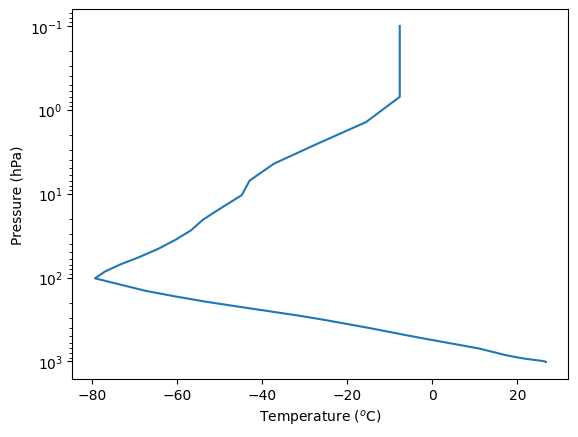

In [11]:
plt.plot(temp.loc[10000] - 273.15, pressures)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel(r"Temperature ($^{o}$C)")
plt.ylabel(r"Pressure (hPa)")

In [28]:
min_temp = np.min(temp, axis = 0)
max_temp = np.max(temp, axis = 0)
mean_temp = np.mean(temp, axis = 0)

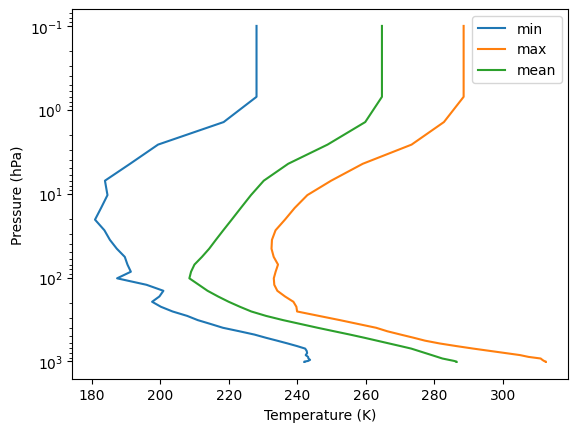

In [40]:
plt.plot(min_temp, pressures, label = 'min')
plt.plot(max_temp, pressures, label = 'max')
plt.plot(mean_temp, pressures, label = 'mean')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel(r"Temperature (K)")
plt.ylabel(r"Pressure (hPa)")
plt.legend()


# Humidity profile

Text(0, 0.5, 'Pressure (hPa)')

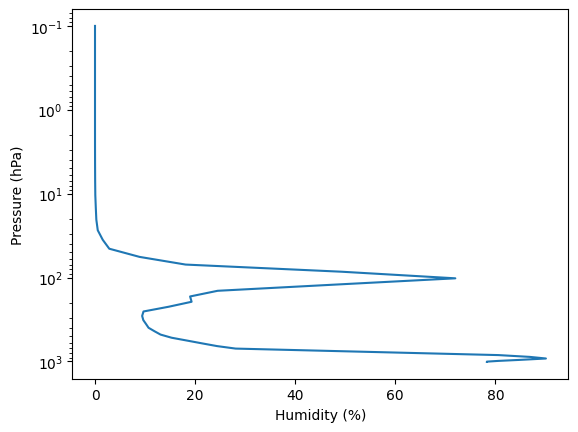

In [41]:
plt.plot(humid.loc[10000], pressures)
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel("Humidity (%)")
plt.ylabel(r"Pressure (hPa)")

In [42]:
min_humid = np.min(humid, axis = 0)
max_humid = np.max(humid, axis = 0)
mean_humid = np.mean(humid, axis = 0)

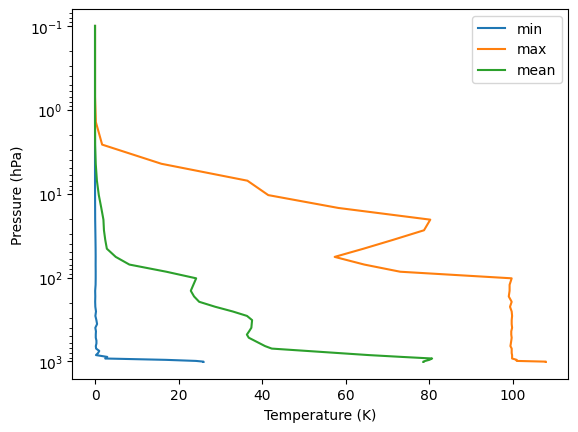

In [43]:
plt.plot(min_humid, pressures, label = 'min')
plt.plot(max_humid, pressures, label = 'max')
plt.plot(mean_humid, pressures, label = 'mean')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel(r"Temperature (K)")
plt.ylabel(r"Pressure (hPa)")
plt.legend()

# 2D-map

In [14]:
lon = mat['LON_O']
lat = mat['LAT_O']

def plot_map(carte, label, title ,lon = lon, lat = lat):
    lon_min, lon_max, lat_min, lat_max = -180, 180, -90, 90
    
    lon[lon > 180] -= 360
    
    # Plotting
    # plt.figure()

    pixelsize = 6
    CARTEmin = np.min(carte) - 0.1
    CARTEmax = np.max(carte)
    range_ = CARTEmax - CARTEmin

    plt.figure()
    plt.colormaps()
    cmap = plt.cm.jet
    clen = cmap.N
    thecolor = np.clip(np.round((carte - CARTEmin) * (clen - 1) / range_), 0, clen - 1).astype(int)

    for il in range(clen-1, -1, -1):
        list_color = np.where(thecolor == il)[0]
        plt.plot(lon[list_color], lat[list_color], '.', markersize=pixelsize, color=cmap(il))
    plt.axis([lon_min, lon_max, lat_min, lat_max])
    plt.title(title)
    fig = plt.gcf()
    cax = fig.add_axes([0.92, 0.1, 0.02, 0.8])  # Adjust the position and size as needed

    # Add colorbar
    norm = plt.Normalize(vmin=CARTEmin, vmax=CARTEmax)
    scalar_map = plt.cm.ScalarMappable(norm=norm, cmap=cmap)
    scalar_map.set_array([])
    cbar = plt.colorbar(scalar_map, cax=cax)
    cbar.set_label(label)

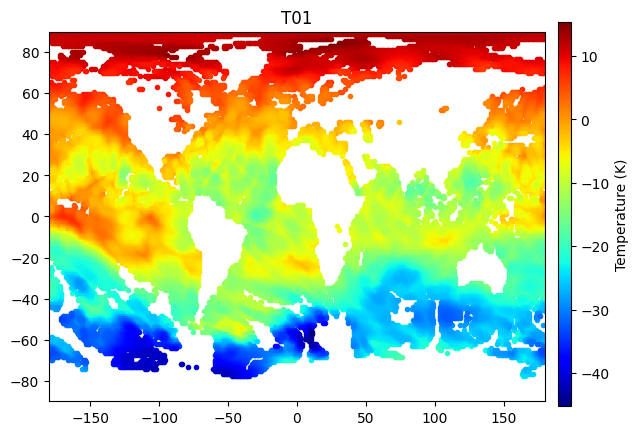

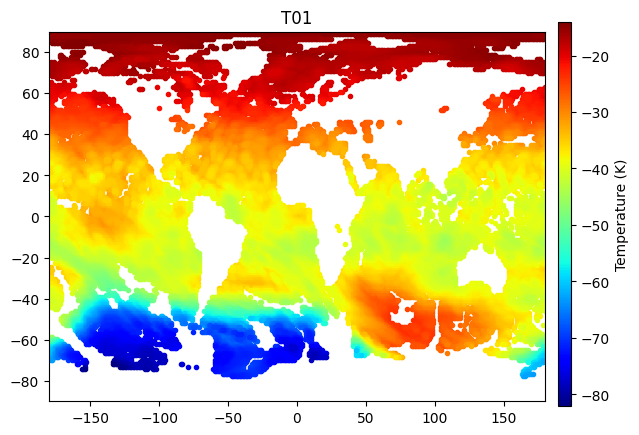

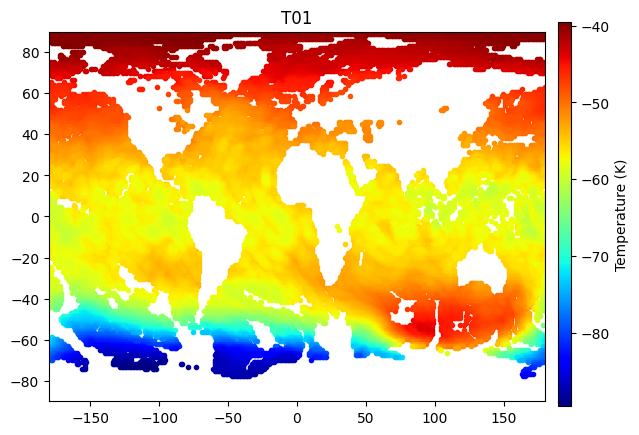

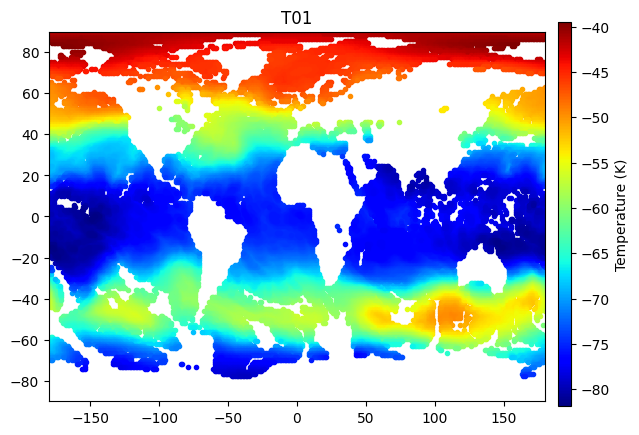

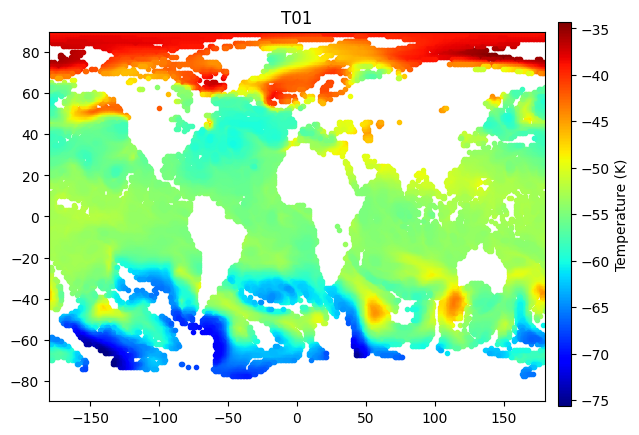

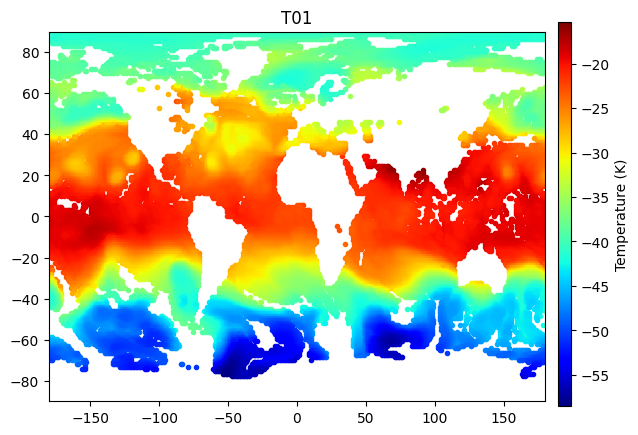

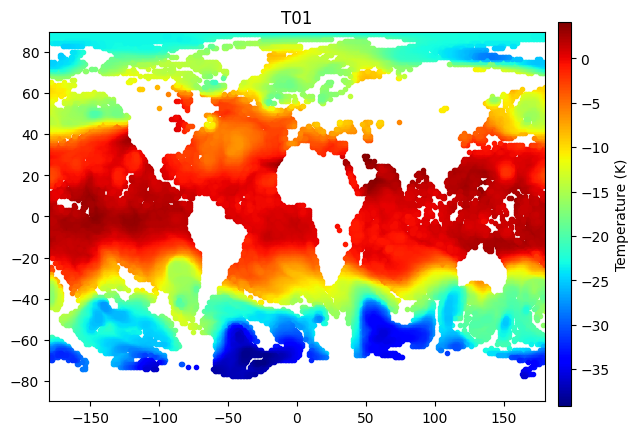

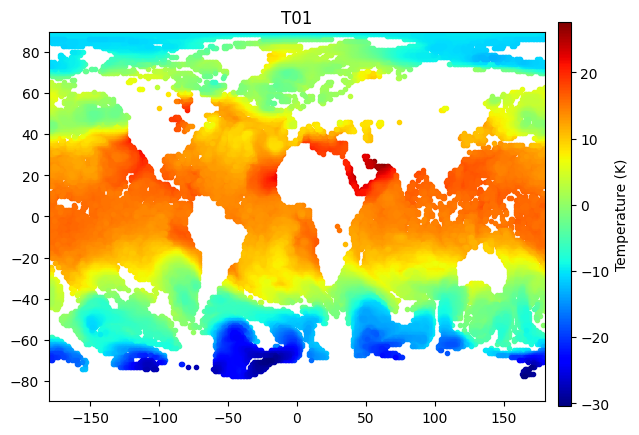

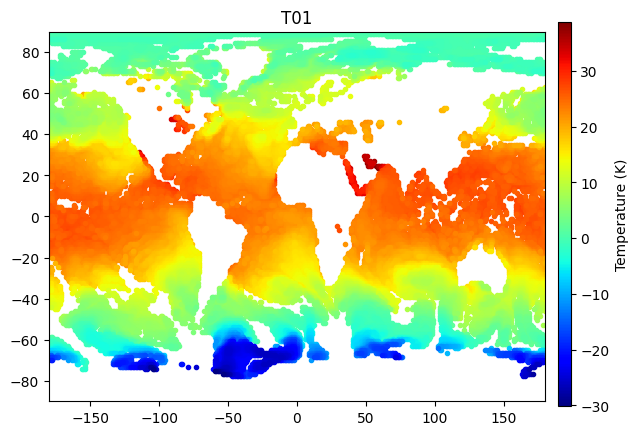

In [18]:
for i in range(0,temp.shape[1],5):
    plot_map(temp.loc[:,i] -273.15, label = 'Temperature (K)', title = legend_PF[0])

<Figure size 640x480 with 0 Axes>

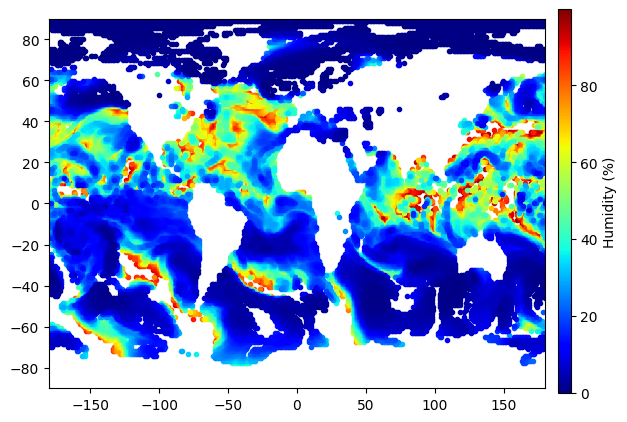

In [9]:
plot_map(humid.loc[:,20], label = 'Humidity (%)', title = legend_amsua[20])

# Satellite

## AMSUA - Temperature

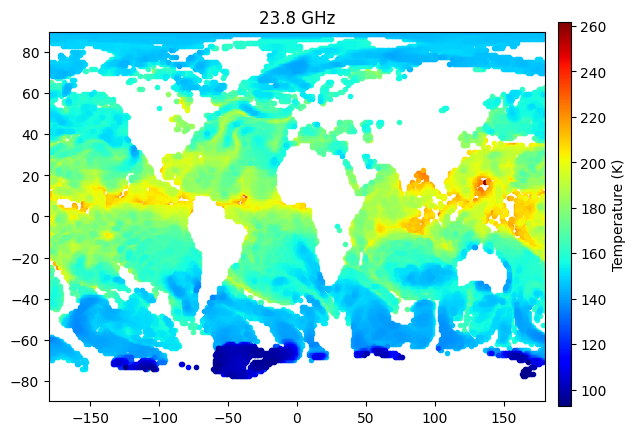

In [57]:
plot_map(AMSUA_O.loc[:,0], label = "Temperature (K)", title = legend_amsua[0])

Text(0, 0.5, 'Temperature (K)')

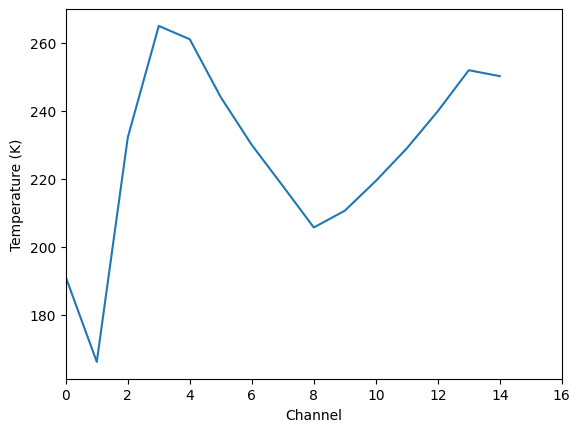

In [203]:
plt.plot(AMSUA_O.loc[10000,:])
plt.xlim(0,16)
plt.xlabel("Channel")
plt.ylabel("Temperature (K)")

Text(0, 0.5, 'Temperature (K)')

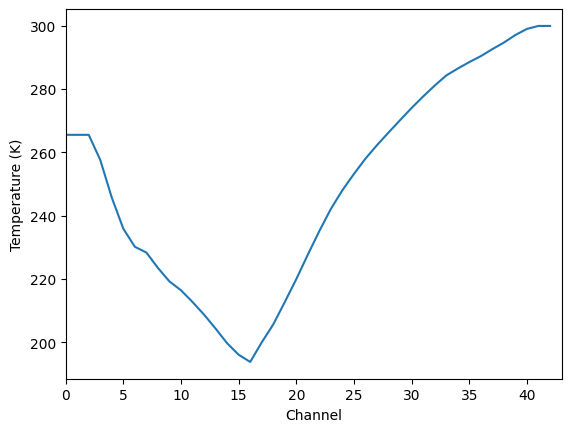

In [204]:
plt.plot(temp.loc[10000,:])
plt.xlim(0,43)
plt.xlabel("Channel")
plt.ylabel("Temperature (K)")

## AMSUB - Sense with humidity

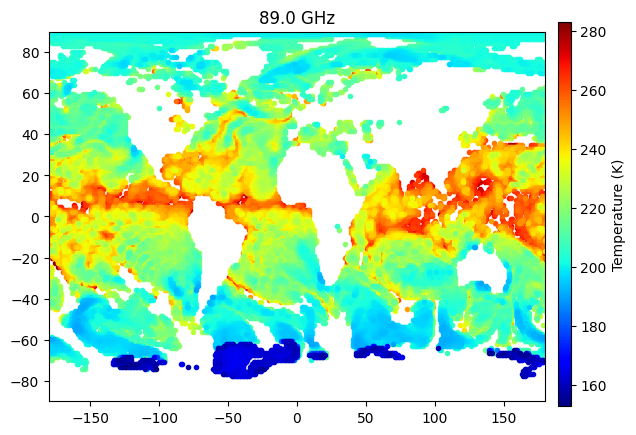

In [55]:
plot_map(AMSUB_O.loc[:,0], label = "Temperature (K)", title = legend_amsub[0])

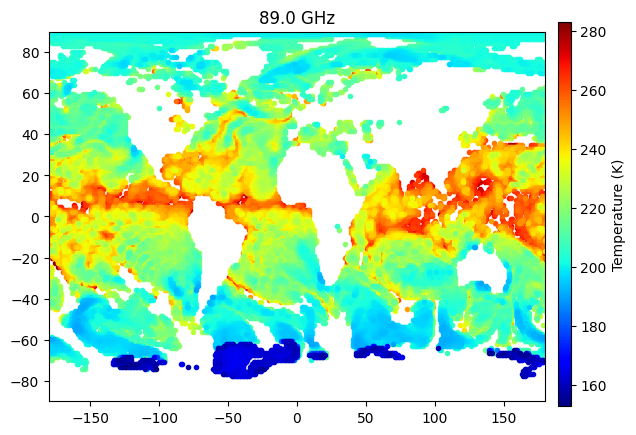

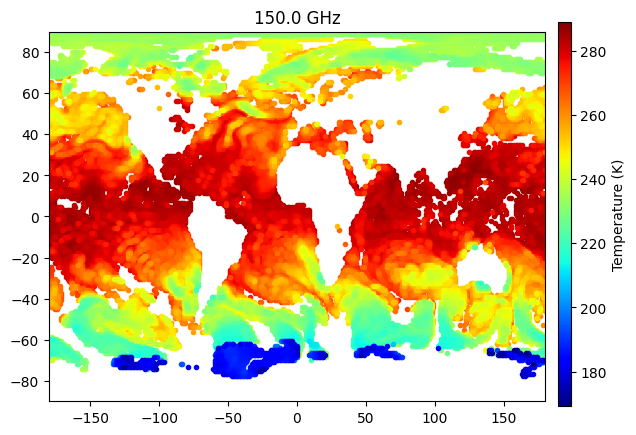

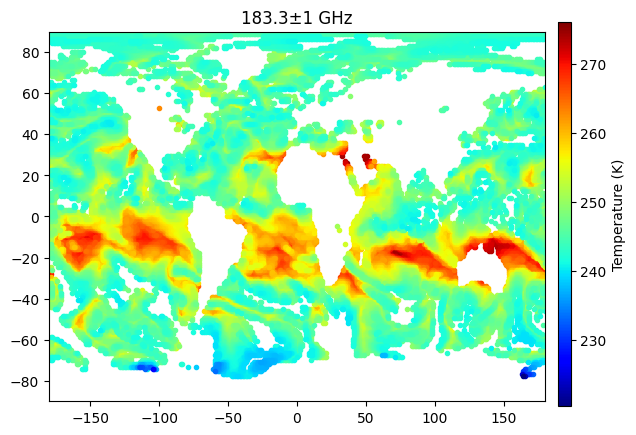

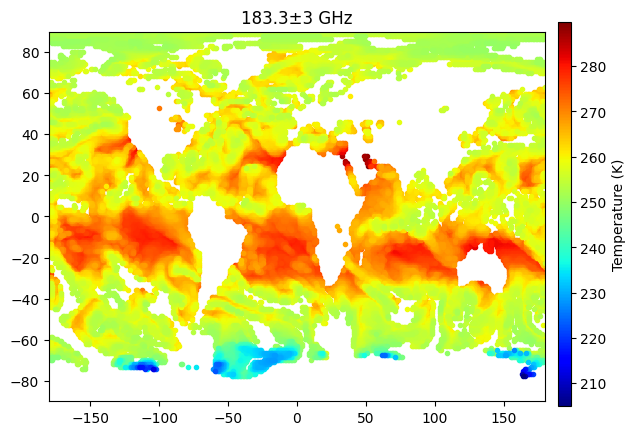

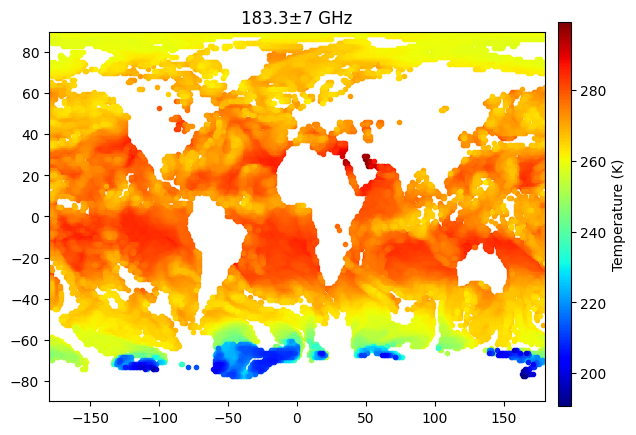

In [56]:
for i in range(5):
    plot_map(AMSUB_O.loc[:,i], label = "Temperature (K)", title = legend_amsub[i])

# Correlation

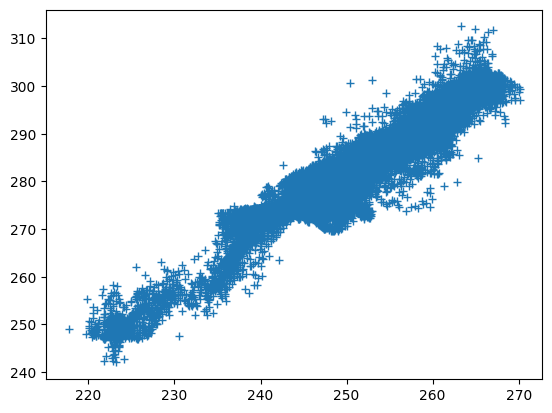

In [138]:
plt.plot(AMSUA_O.loc[:,3],temp.loc[:,42],'+')

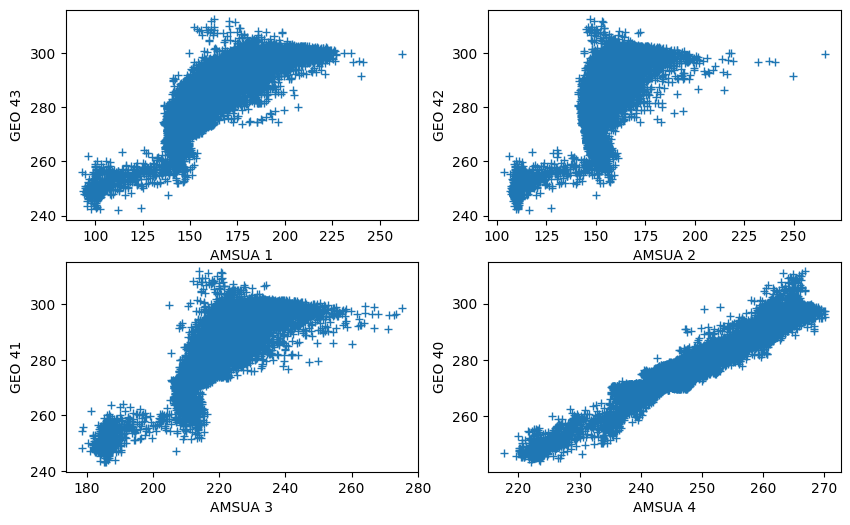

In [141]:
fig = plt.figure(figsize=(10, 6))

for i,j in zip(list(range(0,4)), list(range(1,5)) ):
    ax = fig.add_subplot(2,2,j)
    ax.plot(AMSUA_O.loc[:,i],temp.loc[:,42-i],'+')
    plt.xlabel(f"AMSUA {i+1}")
    plt.ylabel(f"GEO {42-i+1}")

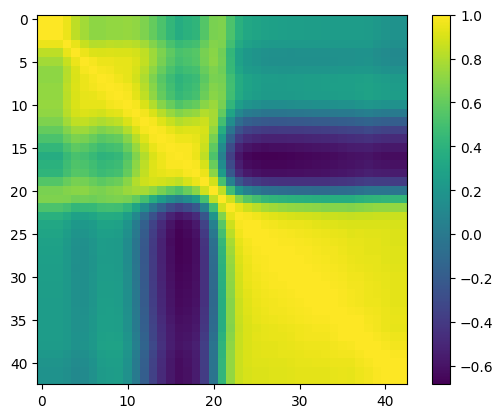

In [210]:
plt.imshow(temp.corr())
plt.colorbar()

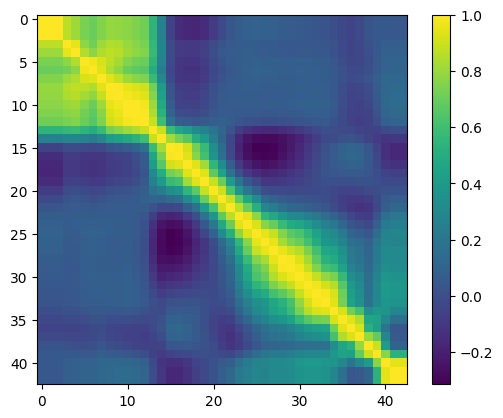

In [215]:
plt.imshow(humid.corr())
plt.colorbar()

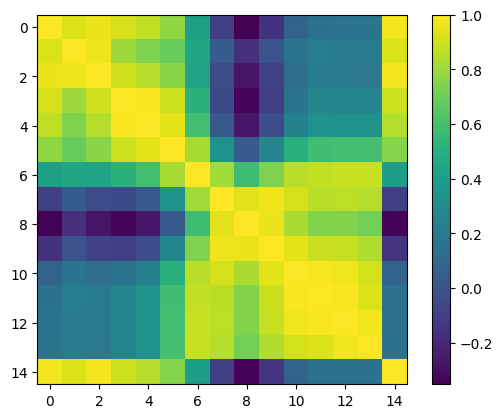

In [216]:
plt.imshow(AMSUA_O.corr())
plt.colorbar()

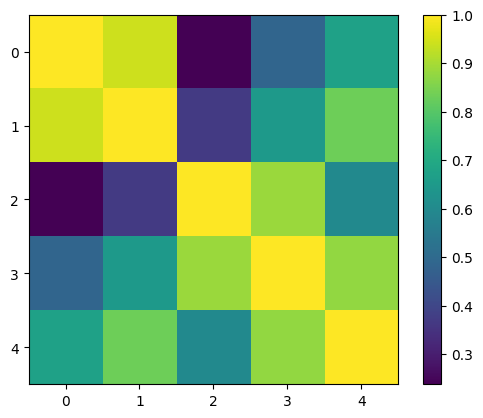

In [217]:
plt.imshow(AMSUB_O.corr())
plt.colorbar()

## Temperature vs AMSUA

In [78]:
temp_amsu = pd.concat([temp, AMSUA_O], axis = 1)
temp_amsu.columns = range(len(temp_amsu.columns))
# temp_amsu

In [79]:
# temp_amsu.corr().iloc[temp.shape[1]:,:temp.shape[1]]

([<matplotlib.axis.YTick at 0x7f9ef56e7130>,
 [Text(0, 0, '23.8'),
  Text(0, 1, '31.4'),
  Text(0, 2, '50.3'),
  Text(0, 3, '52.8'),
  Text(0, 4, '53.7'),
  Text(0, 5, '54.4'),
  Text(0, 6, '54,9'),
  Text(0, 7, '55,5'),
  Text(0, 8, '57,2'),
  Text(0, 9, '57.0'),
  Text(0, 10, '57.0'),
  Text(0, 11, '57.0'),
  Text(0, 12, '57.0'),
  Text(0, 13, '57.0'),
  Text(0, 14, '89.0')])

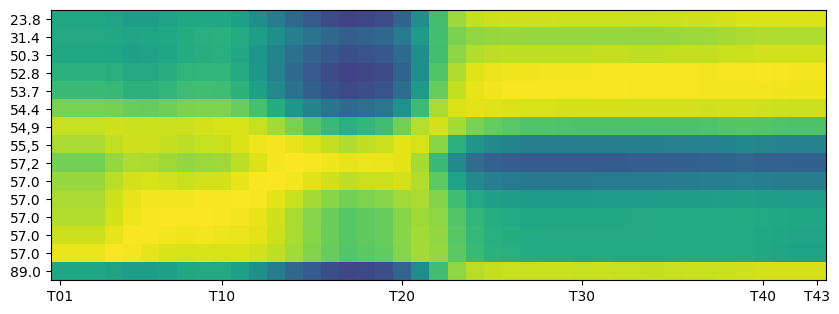

In [123]:
temp_ticks = np.array([1,10,20,30,40,43]) - 1

plt.figure(figsize = (10,10))
plt.imshow(temp_amsu.corr().iloc[temp.shape[1]:,:temp.shape[1]], vmin = -1, vmax = 1)
plt.xticks(temp_ticks, legend_PF[:len(temp_ticks)])
plt.yticks(np.arange(0,15),legend_amsua)

## Humidity vs AMSUB

In [81]:
humid_amsu = pd.concat([humid, AMSUB_O], axis = 1)
humid_amsu.columns = range(len(humid_amsu.columns))
# humid_amsu

([<matplotlib.axis.YTick at 0x7f9ef57040a0>,
 [Text(0, 0, '89.0'),
  Text(0, 5, '150.0'),
  Text(0, 10, '183.3±1'),
  Text(0, 15, '183.3±3'),
  Text(0, 20, '183.3±7')])

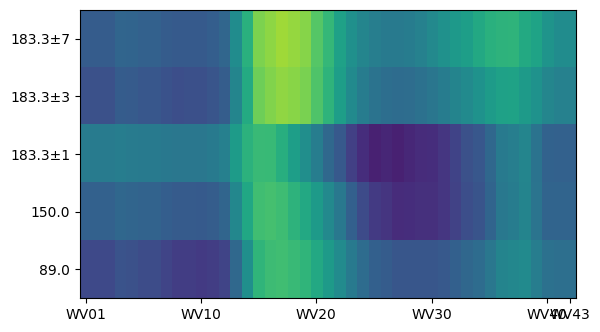

In [122]:
humid_ticks = np.array([44,54,64,74,84,86]) - 44

scale = 5

# plt.figure(figsize = (10,10))
plt.imshow(humid_amsu.corr().iloc[humid.shape[1]:,:humid.shape[1]], extent=(-0.5, 42.5, -0.5*scale, 5*scale - scale + 0.5*scale), interpolation='none', vmin = -1, vmax = 1)
plt.xticks(humid_ticks, legend_PF[-len(humid_ticks):])
plt.yticks(np.arange(0,5*scale,scale),legend_amsub)
# cbar = plt.colorbar()

# Linear Regression

In [146]:
from sklearn.linear_model import LinearRegression

model = LinearRegression()

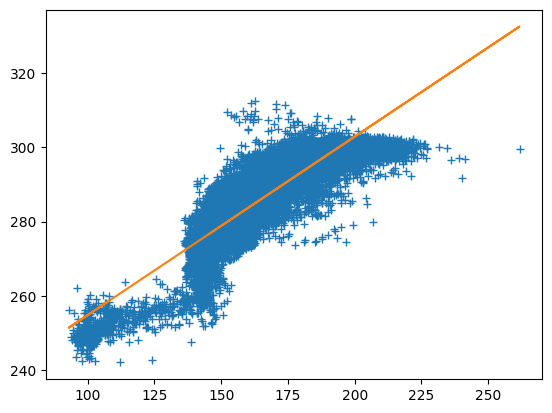

In [165]:
# 1-D
inp = np.array(AMSUA_O.loc[:,0]).reshape(-1,1)
out = GEO_O.loc[:,42]
model.fit(np.array(inp).reshape(-1,1),out)
pred = model.predict(inp)
err = out - pred

plt.plot(inp, out,'+')
plt.plot(inp, pred)

In [172]:
# N-D
model = LinearRegression()
inp = AMSU.loc[:,:14]
out = GEO_O.loc[:,0:42]
model.fit(inp,out)


LinearRegression()

In [173]:
pred_LN = model.predict(inp)
error_LN = out - pred_LN

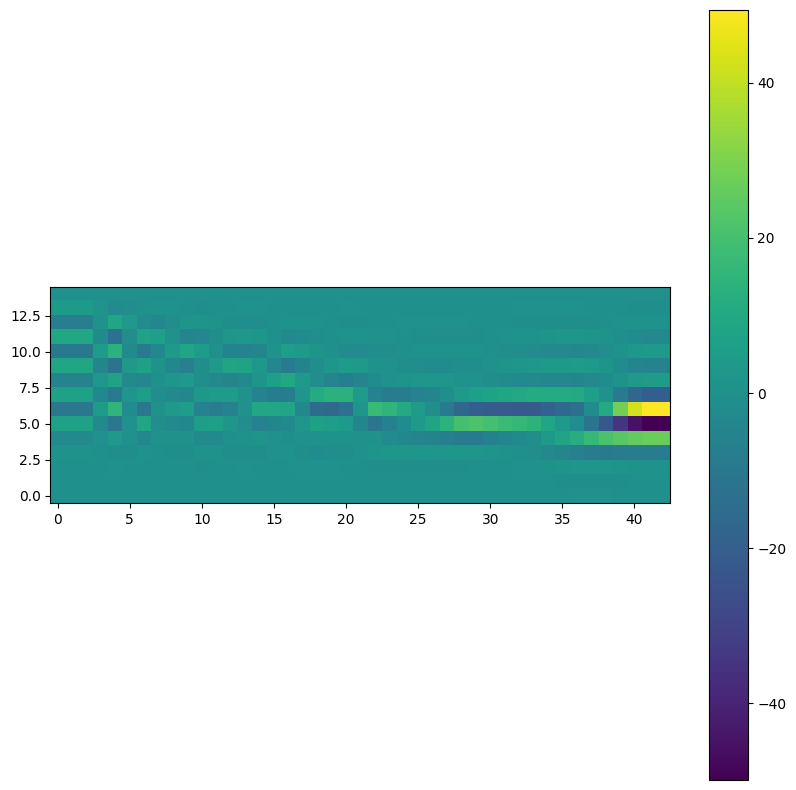

In [174]:
import matplotlib

plt.figure(figsize = (10,10))
plt.imshow(model.coef_.T)
plt.gca().invert_yaxis()
plt.colorbar()

# Neural networks

In [166]:
from sklearn.neural_network import MLPRegressor

neural_model = MLPRegressor(15, early_stopping=True)

inp = AMSU.loc[:,:14]
out = GEO_O.loc[:,0:42]
neural_model.fit(inp,out)

/home/tinmai/anaconda3/envs/tin/lib/python3.9/site-packages/sklearn/neural_network/_multilayer_perceptron.py:691: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


MLPRegressor(early_stopping=True, hidden_layer_sizes=15)

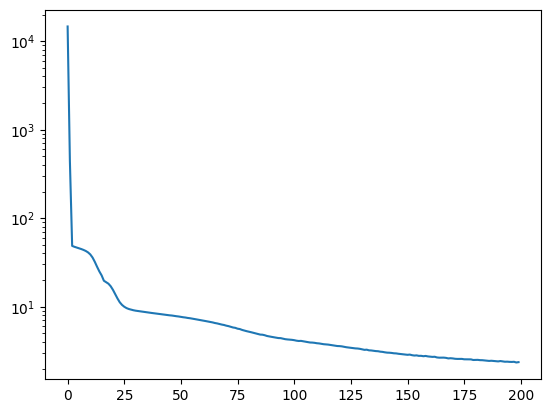

In [167]:
plt.plot(neural_model.loss_curve_)
plt.yscale('log')

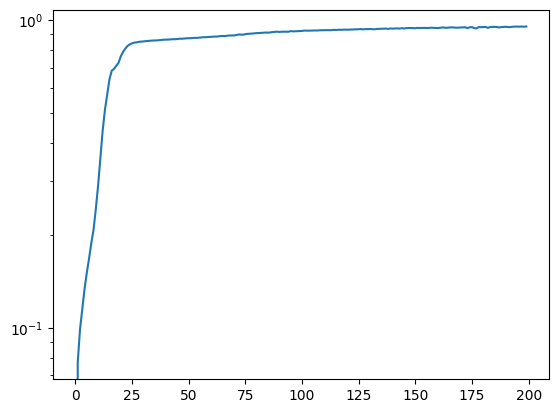

In [169]:
plt.plot(neural_model.validation_scores_)
plt.yscale('log')

In [170]:
pred_NN = neural_model.predict(inp)
error_NN = out - pred_NN

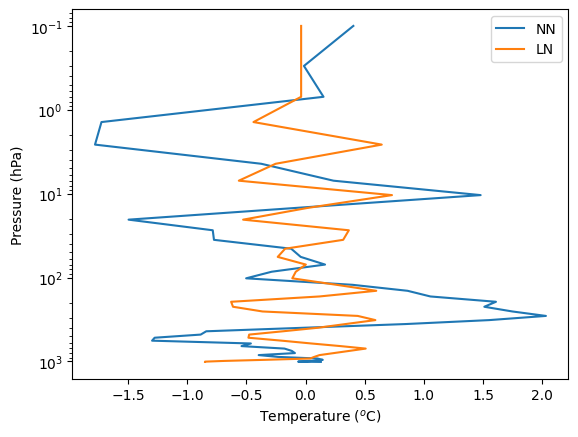

In [175]:
plt.plot(error_NN.loc[10000,:], pressures, label = 'NN')
plt.plot(error_LN.loc[10000,:], pressures, label = 'LN')
plt.yscale('log')
plt.gca().invert_yaxis()
plt.xlabel(r"Temperature ($^{o}$C)")
plt.ylabel(r"Pressure (hPa)")
plt.legend()

# Classification

## Clustering

In [206]:
from sklearn.cluster import KMeans

kmeans = KMeans(n_clusters=5, random_state=0, n_init="auto")



In [207]:
kmeans.fit(temp)

KMeans(n_clusters=5, n_init='auto', random_state=0)

<Figure size 640x480 with 0 Axes>

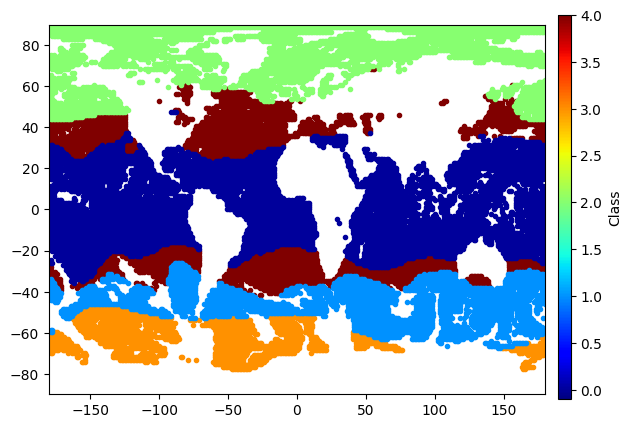

In [208]:
plot_map(kmeans.labels_, label = "Class")

# PCA

In [124]:
from sklearn.decomposition import PCA

def plot_var(data):
    pca = PCA()
    pca.fit(data)
    var_cumu = np.cumsum(pca.explained_variance_ratio_)*100
    
    k =np.where(var_cumu>95)[0][0]


    plt.figure(figsize=[10,5])
    plt.title('Cumulative Explained Variance explained by the components')
    plt.ylabel('Cumulative Explained variance')
    plt.xlabel('Principal components')
    plt.axvline(x=k, color="k", linestyle="--")
    plt.axhline(y=var_cumu[k], color="r", linestyle="--")
    plt.plot(var_cumu)
    plt.xticks(np.arange(0,40,k))
    return var_cumu
    
def do_pca(data,ncomps):
    pca = PCA(n_components=ncomps)
    pca_transform = pca.fit_transform(data)
    pca_inverted = pca.inverse_transform(pca_transform)
    
    return pd.DataFrame(pca_inverted)

array([ 51.81067787,  91.02375773,  94.61523365,  96.45116105,
        97.91630232,  98.4284972 ,  98.80356667,  99.1016421 ,
        99.34986604,  99.5373328 ,  99.68961775,  99.7729512 ,
        99.84574596,  99.88453495,  99.91451539,  99.94114336,
        99.96346277,  99.97684226,  99.9882063 ,  99.99592323,
        99.99999697,  99.99999718,  99.99999736,  99.99999752,
        99.99999768,  99.99999784,  99.999998  ,  99.99999816,
        99.99999832,  99.99999847,  99.99999863,  99.99999879,
        99.99999894,  99.99999909,  99.99999925,  99.9999994 ,
        99.99999955,  99.9999997 ,  99.99999985, 100.        ,
       100.        , 100.        , 100.        ])

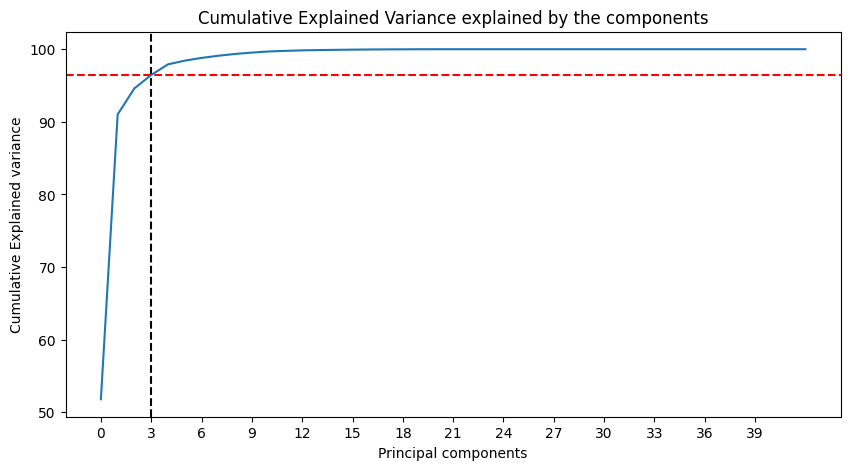

In [125]:
plot_var(temp)

In [126]:
new_temp = do_pca(temp, 3)

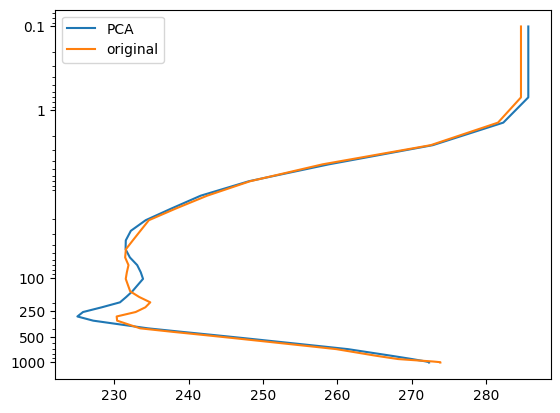

In [132]:
plt.plot(new_temp.loc[1000,:], pressures, label = 'PCA')
plt.yscale('log')
plt.plot(temp.loc[1000,:], pressures, label = 'original')
plt.gca().invert_yaxis()
plt.yticks([1000,500,250,100,1,0.1],[1000,500,250,100,1,0.1])
plt.legend()

In [130]:
new_temp

0           1           2           3           4           5   \
0      286.288625  286.288625  286.288625  282.770659  273.035850  258.913394   
1      286.288625  286.288625  286.288625  282.770659  273.035850  258.913394   
2      286.288625  286.288625  286.288625  282.770659  273.035850  258.913394   
3      286.288625  286.288625  286.288625  282.770659  273.035850  258.913394   
4      286.288625  286.288625  286.288625  282.770659  273.035850  258.913394   
...           ...         ...         ...         ...         ...         ...   
25387  234.674764  234.674764  234.674764  224.000815  205.141814  193.151913   
25388  234.691719  234.691719  234.691719  224.078893  205.312670  193.369504   
25389  234.904787  234.904787  234.904787  224.261501  205.443520  193.459724   
25390  235.323568  235.323568  235.323568  224.552491  205.529275  193.412647   
25391  235.911136  235.911136  235.911136  224.933899  205.582016  193.259762   

               6           7           8           9   ...          33  \
0      248.081566  241.622258  237.671610  234.204671  ...  261.766014   
1      248.081566  241.622258  237.671610  234.204671  ...  261.766014   
2      248.081566  241.622258  237.671610  234.204671  ...  261.766014   
3      248.081566  241.622258  237.671610  234.204671  ...  261.766014   
4      248.081566  241.622258  237.671610  234.204671  ...  261.766014   
...           ...         ...         ...         ...  ...         ...   
25387  187.715118  185.897583  185.656351  185.604455  ...  248.012165   
25388  187.959266  186.148055  185.890222  185.821077  ...  248.328888   
25389  188.023961  186.207542  185.944771  185.871020  ...  248.400426   
25390  187.896835  186.063557  185.808264  185.743321  ...  248.217364   
25391  187.622443  185.765132  185.526583  185.480351  ...  247.866558   

               34          35          36          37          38          39  \
0      263.810978  265.716593  267.472828  268.996766  270.324477  271.375580   
1      263.810978  265.716593  267.472828  268.996766  270.324477  271.375580   
2      263.810978  265.716593  267.472828  268.996766  270.324477  271.375580   
3      263.810978  265.716593  267.472828  268.996766  270.324477  271.375580   
4      263.810978  265.716593  267.472828  268.996766  270.324477  271.375580   
...           ...         ...         ...         ...         ...         ...   
25387  249.562432  251.006592  252.337753  253.124466  253.702940  255.717657   
25388  249.886965  251.338400  252.676263  253.474049  254.063685  256.086865   
25389  249.956480  251.406029  252.742156  253.537060  254.123790  256.141812   
25390  249.761016  251.199018  252.524502  253.301797  253.870774  255.869378   
25391  249.389862  250.808916  252.116938  252.865326  253.405156  255.373639   

               40          41          42  
0      272.197745  272.597712  272.597712  
1      272.197745  272.597712  272.597712  
2      272.197745  272.597712  272.597712  
3      272.197745  272.597712  272.597712  
4      272.197745  272.597712  272.597712  
...           ...         ...         ...  
25387  257.397831  258.214012  258.214012  
25388  257.773633  258.593015  258.593015  
25389  257.824353  258.641684  258.641684  
25390  257.536372  258.346157  258.346157  
25391  257.016603  257.814727  257.814727  

[25392 rows x 43 columns]